train.csv - The training set.
Id Unique identifier for each observation.
AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.

[Logistic Regression, Random Forest, Gradient Boosting Models (e.g., XGBoost, LightGBM, Support Vector Machines (SVM)]

GridSearchCV
RandomizedSearchCV
Bayesian Optimization
HyperOpt
Optuna

##### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

###### Data Loading

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(617, 58)


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

##### Clean data

In [4]:
data['EJ'].value_counts()

EJ
B    395
A    222
Name: count, dtype: int64

In [5]:
# converting categorical columns
data = data.replace({'EJ':{'A':0, 'B':1}})

In [6]:
data.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [7]:
# fill missing age values with the median value
data['BQ'] = data['BQ'].fillna(data['BQ'].median())
data['CB'] = data['CB'].fillna(data['CB'].median())
data['CC'] = data['CC'].fillna(data['CC'].median())
data['DU'] = data['DU'].fillna(data['DU'].median())
data['EL'] = data['EL'].fillna(data['EL'].median())

data['FC'] = data['FC'].fillna(data['FC'].median())
data['FL'] = data['FL'].fillna(data['FL'].median())
data['FS'] = data['FS'].fillna(data['FS'].median())
data['GL'] = data['GL'].fillna(data['GL'].median())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [9]:
data.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [10]:
data['Class'].value_counts()

Class
0    509
1    108
Name: count, dtype: int64

In [11]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.429301,3.533905,0.420947,20.724856,131.714987,14679.595398,31.489716,50.584437,8.517682,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.487330,50.181948,1.303281,9.991907,144.181524,19352.959387,9.864239,36.266251,10.323895,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124414,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.237329,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


###### Find correlation

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [21]:
data = data.drop("Id", axis=1)

In [22]:
correlation_matrix = data.corr()

correlation_threshold = 0.5

In [23]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
AB - AM: 0.53
AH - AR: 0.75
AH - CH: 0.68
AH - CL: 0.69
AH - CS: 0.63
AH - DV: 0.75
AH - EB: 0.71
AH - EP: 0.68
AM - AB: 0.53
AR - AH: 0.75
AR - CH: 0.66
AR - CL: 0.75
AR - CS: 0.72
AR - DV: 0.82
AR - EB: 0.74
AR - EP: 0.75
AY - BD : 0.51
BC - BD : 0.75
BC - BZ: 0.91
BC - CF: 0.55
BD  - AY: 0.51
BD  - BC: 0.75
BD  - BZ: 0.68
BZ - BC: 0.91
BZ - BD : 0.68
BZ - CC: 0.51
BZ - CF: 0.54
CC - BZ: 0.51
CF - BC: 0.55
CF - BZ: 0.54
CH - AH: 0.68
CH - AR: 0.66
CH - CL: 0.56
CH - CS: 0.60
CH - DV: 0.61
CH - EB: 0.62
CH - EP: 0.57
CL - AH: 0.69
CL - AR: 0.75
CL - CH: 0.56
CL - CS: 0.63
CL - DV: 0.95
CL - EB: 0.62
CL - EP: 0.65
CS - AH: 0.63
CS - AR: 0.72
CS - CH: 0.60
CS - CL: 0.63
CS - DV: 0.69
CS - EB: 0.69
CS - EP: 0.79
DU - EH: 0.85
DU - FD : 0.81
DU - FL: 0.61
DV - AH: 0.75
DV - AR: 0.82
DV - CH: 0.61
DV - CL: 0.95
DV - CS: 0.69
DV - EB: 0.69
DV - EP: 0.72
EB - AH: 0.71
EB - AR: 0.74
EB - CH: 0.62
EB - CL: 0.62
EB - CS: 0.69
EB - DV: 0.69
EB - EP: 0.73
EH - DU: 0.85

In [24]:
# find highly correlated features with diagnosis
highly_correlated_features = np.abs(correlation_matrix['Class']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Diagnosis: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Diagnosis: 


AttributeError: 'Series' object has no attribute 'iteritems'

###### Data training and prediction analysis

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

In [19]:
X = data.drop(['Class', 'Id'], axis=1)
y = data['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

###### Cross-validation function

In [25]:
# Define a function to evaluate the model using cross-validation and print various metrics
def evaluate_model(model, X_train, y_train):
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy)*100:.2f}")
    print(f"Cross-Validation Precision: {np.mean(cv_precision)*100:.2f}")
    print(f"Cross-Validation Recall: {np.mean(cv_recall)*100:.2f}")
    print(f"Cross-Validation F1-Score: {np.mean(cv_f1)*100:.2f}")
    print(f"Cross-Validation ROC-AUC: {np.mean(cv_roc_auc)*100:.2f}")

    return cv_accuracy, cv_precision, cv_recall, cv_f1, cv_roc_auc

#### Without cross-validation

#### Unscaled-data

##### Test 1

In [26]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 83.87096774193549
Precision: 0.70
Recall: 0.37
F1-Score: 0.48
Confusion Matrix:
[[142   6]
 [ 24  14]]


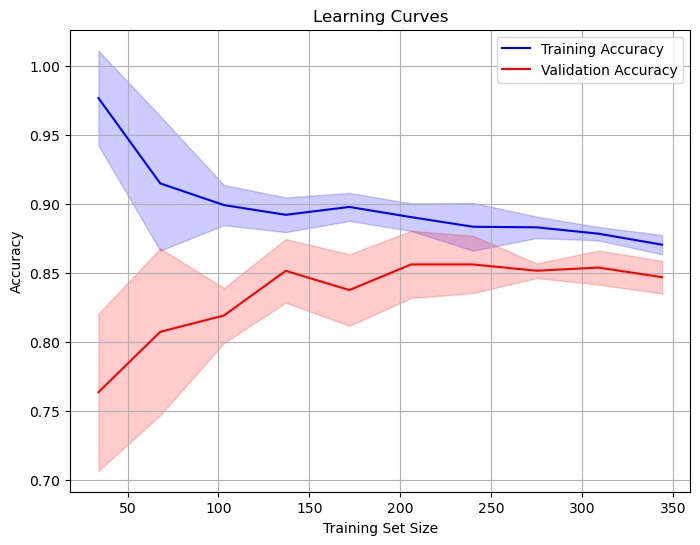

In [27]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

##### Test 2

#### Hyperparameter tuning using GridSearchCV

In [28]:
# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Best Parameters: 
{'C': 0.1}

Accuracy: 83.87096774193549
Precision: 0.70
Recall: 0.37
F1-Score: 0.48
Confusion Matrix:
[[142   6]
 [ 24  14]]


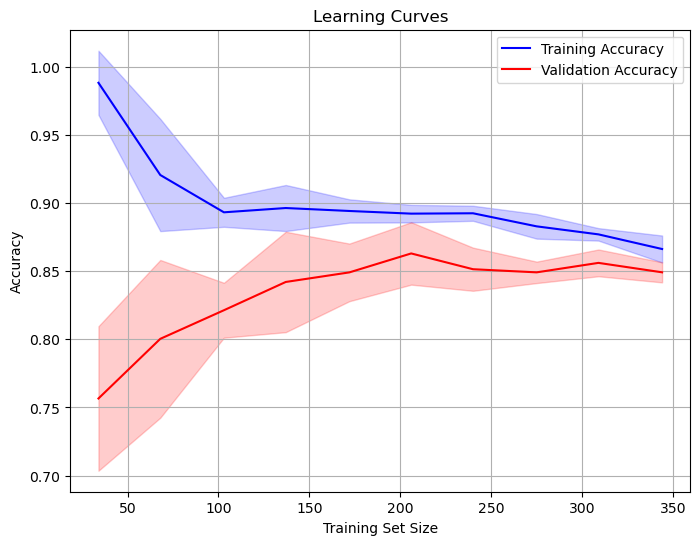

In [29]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

#### Scaled-data

##### Test 1

In [32]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 89.78494623655914
Precision: 0.74
Recall: 0.76
F1-Score: 0.75
Confusion Matrix:
[[138  10]
 [  9  29]]


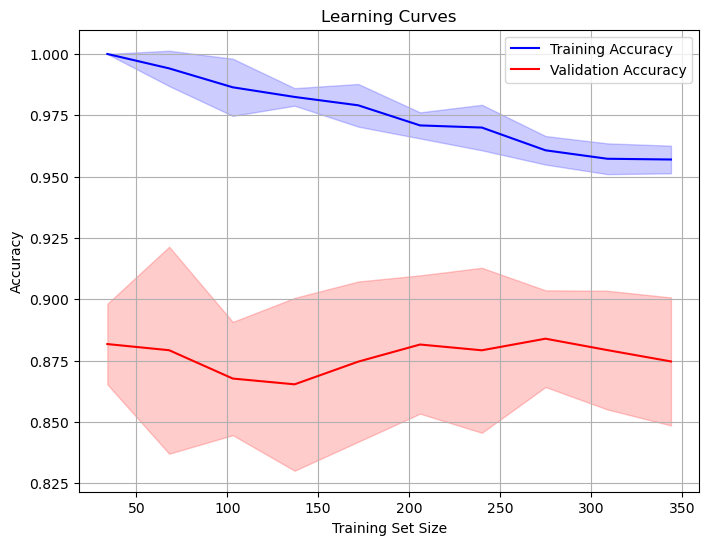

In [33]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

##### Test 2

#### Hyperparameter tuning using GridSearchCV

In [34]:
# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Best Parameters: 
{'C': 0.1}

Accuracy: 89.78494623655914
Precision: 0.79
Recall: 0.68
F1-Score: 0.73
Confusion Matrix:
[[141   7]
 [ 12  26]]


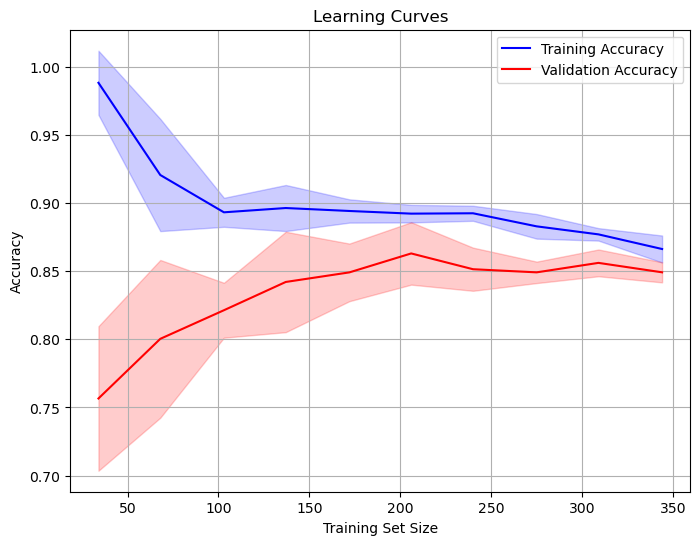

In [35]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

### With cross-validation

#### Unscaled-data

##### Test 1

Test 1: Logistic Regression Machines without scaling
Cross-Validation Accuracy: 85.15
Cross-Validation Precision: 60.33
Cross-Validation Recall: 30.00
Cross-Validation F1-Score: 39.07
Cross-Validation ROC-AUC: 76.29


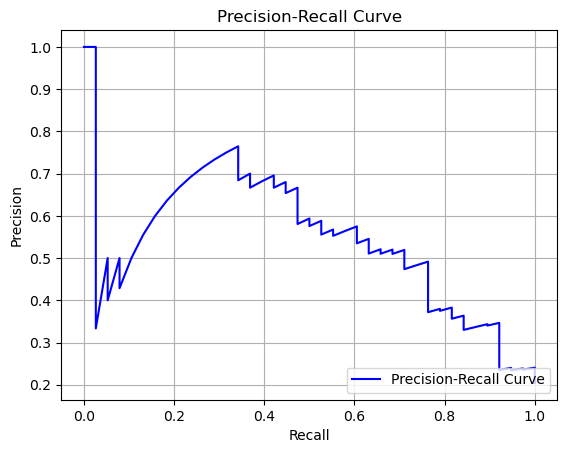

In [36]:
# Test 1: Logistic Regression without scaling
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model using cross-validation and print various metrics
print("Test 1: Logistic Regression Machines without scaling")
cv_accuracy, cv_precision, cv_recall, cv_f1, cv_roc_auc = evaluate_model(model, X_train, y_train)

# Plot the precision-recall curve
y_probs = model.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Evaluate the model using cross-validation and print various metrics
print("Test 2: Logistic Regression Machines without scaling")
cv_accuracy, cv_precision, cv_recall, cv_f1, cv_roc_auc = evaluate_model(best_model, X_train, y_train)

# Plot the precision-recall curve
y_probs = best_model.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Best Parameters: 
{'C': 0.1}

Test 2: Logistic Regression Machines without scaling


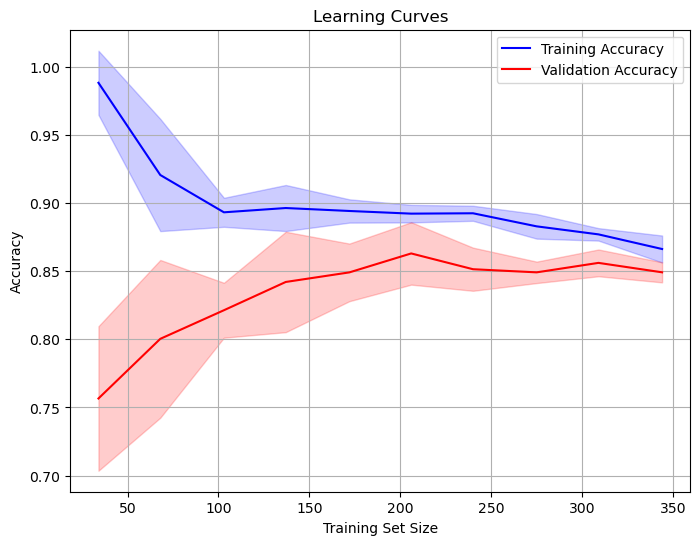

In [38]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

#### Scaled-data

##### Test 1

Test 1: Logistic Regression with scaling
Cross-Validation Accuracy: 87.47
Cross-Validation Precision: 65.31
Cross-Validation Recall: 50.00
Cross-Validation F1-Score: 56.07
Cross-Validation ROC-AUC: 87.84


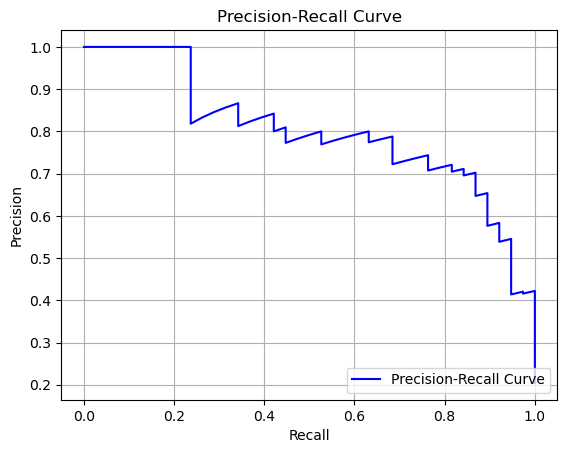

In [40]:
# Test 1: Logistic Regression with scaling
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model using cross-validation and print various metrics
print("Test 1: Logistic Regression with scaling")
cv_accuracy, cv_precision, cv_recall, cv_f1, cv_roc_auc = evaluate_model(model, X_train_scaled, y_train)

# Plot the precision-recall curve
y_probs = model.decision_function(X_test_scaled)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Test 2

#### Hyperparameter tuning using GridSearchCV


Best Parameters: 
{'C': 0.1}

Test 2: Logistic Regression with scaling
Cross-Validation Accuracy: 89.32
Cross-Validation Precision: 84.29
Cross-Validation Recall: 45.71
Cross-Validation F1-Score: 56.90
Cross-Validation ROC-AUC: 89.20


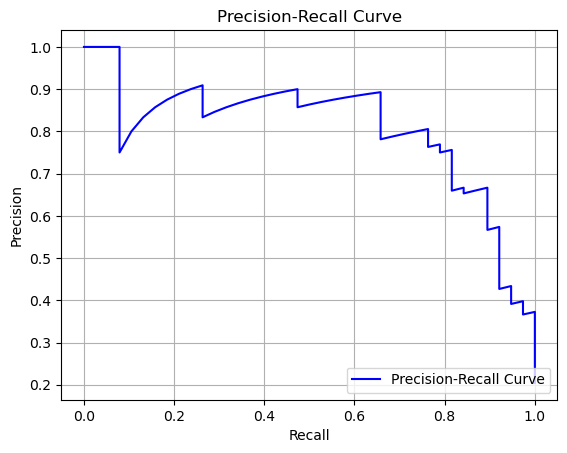

In [43]:
# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Evaluate the model using cross-validation and print various metrics
print("Test 2: Logistic Regression with scaling")
cv_accuracy, cv_precision, cv_recall, cv_f1, cv_roc_auc = evaluate_model(best_model, X_train_scaled, y_train)

# Plot the precision-recall curve
y_probs = best_model.decision_function(X_test_scaled)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

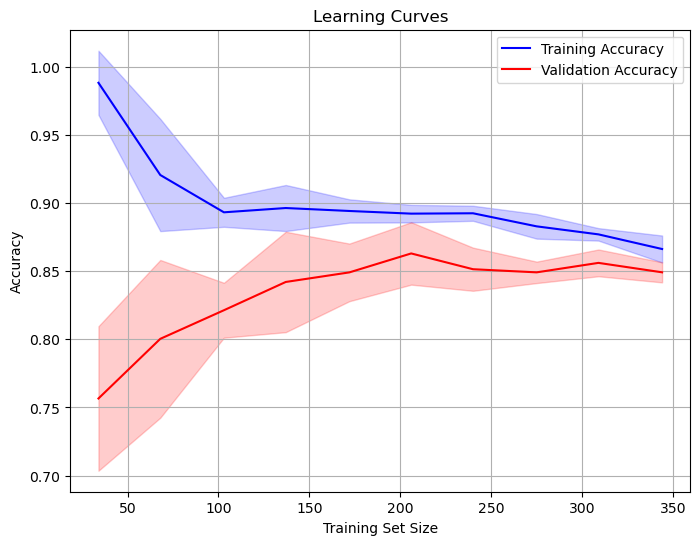

In [42]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()